# Лабораторная работа №2 - распознавание диабета

### Тев Никита, 4 курс, 3 группа

### Для лабораторной использовались данные с kaggle
### https://www.kaggle.com/ahmettezcantekin/beginner-datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

test_size = 100
d = []

In [2]:
df = pd.read_csv('diabet.csv')
df.head()

,numb_times_pregnant,glucose_level,body_mass_index,age,diabet
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1


In [3]:
#fig = plt.figure(figsize = [18, 8])
#x = [i for i in range(768)]
#plt.scatter(x, df['body_mass_index'].to_numpy(), c = df['diabet'].to_numpy())

### Посмотрим на среднее значение параметров в группах с диабетом и без, чтобы убедиться в их значимости для классификации

In [4]:
means = df.iloc[test_size:].groupby('diabet').mean()
means

,numb_times_pregnant,glucose_level,body_mass_index,age
diabet,,,,
0,3.189931,110.473684,30.523112,31.185355
1,4.753247,141.887446,35.203896,36.619048


## Теперь введем функцию для определения расстояния между двумя объектами

Так как параметры имеют разный масштаб, будет разумно строить дистанционную функцию с приведением их к одному масштабу. Для этого вычислим среднее выборочное значение для каждого из параметров, и чтобы получить расстояние между объектами по соответствующей оси, будем модуль разности их координат на это значение делить.

In [5]:
# среднее по всей обучающей выборке

means_all = df.iloc[test_size:].mean()
means_all

numb_times_pregnant      3.730539
glucose_level          121.336826
body_mass_index         32.141766
age                     33.064371
diabet                   0.345808
dtype: float64

In [6]:
def dist(x1, x2):
    dist = 0
    for i in range(len(x1)):
        dist += np.absolute(x1[i] - x2[i]) / means_all.iloc[i]
    return dist

## Введем несколько функций для вычисления расстояний до определенного класса

1. Для каждого класса найдем его 'типичного представителя' - объект, у которого все значения параметров совпадают со средними по классу. Тогда расстоянием от заданного объекта до класса будем считать расстояние от объекта до типичного представителя этого класса.

In [7]:
def dist_class_1(obj, cl):
    return dist(obj, means.iloc[cl])

2. Расстоянием от объекта до класса будем считать минимальное из расстояний до объектов, принадлежащих данному классу.

In [8]:
def dist_class_2(index_in_test_sample, cl):
    dist_sublist = []
    
    for j in df[df['diabet'] == cl].loc[test_size:].index.to_list():
        dist_sublist.append(d[index_in_test_sample][j - test_size])
       
    dist_sublist.sort()
        
    return dist_sublist[0]

## Перейдем непосредственно к алгоритму классификации

Выделяем обучающую и тестовую выборки

In [9]:
x, labels = df.loc[:, df.columns != 'diabet'], df['diabet']

x_train, train_labels = x[test_size:], labels[test_size:]
x_test, test_labels = x[:test_size], labels[:test_size]

test_labels_arr = test_labels.to_numpy()

Считаем матрицу попарных расстояний между элементами тренировочной и тестовой выборок

In [10]:
d = []
for i in range(len(x_test)):
    d.append([])
    for j in range(len(x_train)):
        d[-1].append(dist(x_test.iloc[i], x_train.iloc[j]))

# Тестируем алгоритм с первой функцией расстояний до классов

In [11]:
predicted_labels = []

for i in range(len(x_test)):
    dist_diabet_false = dist_class_1(x_test.iloc[i], 0)
    dist_diabet_true = dist_class_1(x_test.iloc[i], 1)
    
    if(dist_diabet_false < dist_diabet_true):
        predicted_labels.append(0)
    else:
        predicted_labels.append(1)

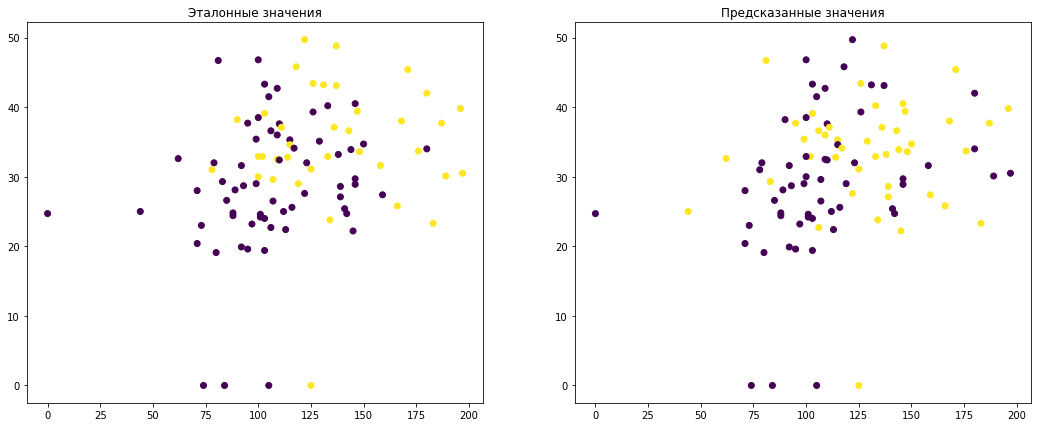

In [12]:
fig = plt.figure(figsize=(18, 7))
    
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x_test['glucose_level'].to_numpy(), x_test['body_mass_index'].to_numpy(), c = test_labels)
ax.set_title("Эталонные значения")
    
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x_test['glucose_level'].to_numpy(), x_test['body_mass_index'].to_numpy(), c = predicted_labels)
ax.set_title("Предсказанные значения")
    
plt.show()

In [20]:
counter_good = 0

for i in range(len(predicted_labels)):
    if(predicted_labels[i] == test_labels[i]):
        counter_good += 1

In [22]:
print('Верно предсказано ' + str(counter_good) + ' из ' + str(test_size) + ' тестовых значений')

Верно предсказано 62 из 100 тестовых значений


Таким образом, данная функция близости объектов к классам позволила правильно классифицировать 62 из 100 объектов. Результат неплохой, но возможно удастся получить что-то получше. Протестируем второй способ вычисления расстояния до классов.

# Тестируем алгоритм со второй функцией расстояний до классов

In [15]:
predicted_labels2 = []

for i in range(len(x_test)):
    dist_diabet_false = dist_class_2(i, 0)
    dist_diabet_true = dist_class_2(i, 1)
    
    if(dist_diabet_false < dist_diabet_true):
        predicted_labels2.append(0)
    else:
        predicted_labels2.append(1)

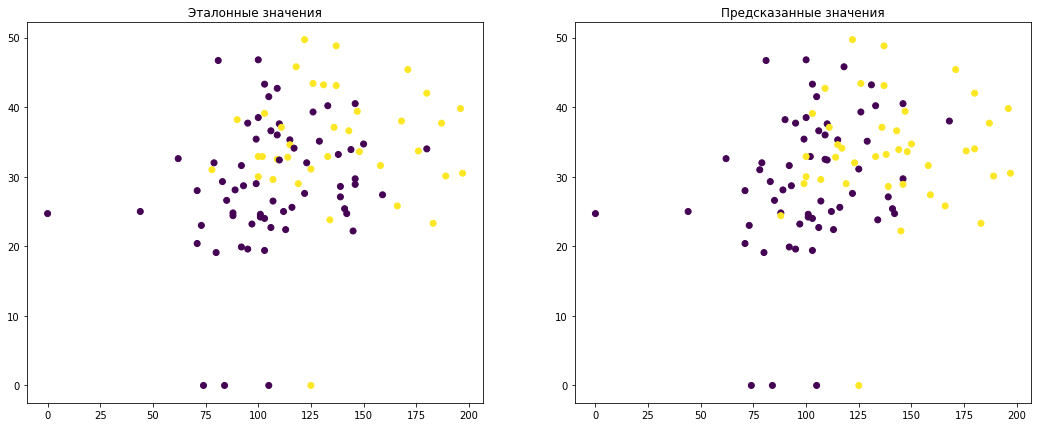

In [16]:
fig = plt.figure(figsize=(18, 7))
    
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x_test['glucose_level'].to_numpy(), x_test['body_mass_index'].to_numpy(), c = test_labels)
ax.set_title("Эталонные значения")
    
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x_test['glucose_level'].to_numpy(), x_test['body_mass_index'].to_numpy(), c = predicted_labels2)
ax.set_title("Предсказанные значения")
    
plt.show()

In [23]:
counter_good = 0

for i in range(len(predicted_labels2)):
    if(predicted_labels2[i] == test_labels[i]):
        counter_good += 1

In [24]:
print('Верно предсказано ' + str(counter_good) + ' из ' + str(test_size) + ' тестовых значений')

Верно предсказано 78 из 100 тестовых значений


С другой функцией результат получился гораздо лучше - 78 из 100 значений. Строго говоря, сильно полагаться на полученные таким образом значения не стоит, по-хорошему чтобы получить репрезентативный показатель, следовало хотя бы провести кросс-валидацию на разных тренировочных и тестовых данных. Однако подобный анализ модели выходит за пределы заявленной темы лабораторной, поэтому я считаю, что полученных результатов будет вполне достаточно.